<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

### 1) 타겟으로 사용할 특성을 선택합니다.
- **(객관식) 다음 중 설명이 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    - 특성 3개를 사용해 가장 성능이 좋은 모델 A를 만들고 또 특성 5개를 사용해 최적의 모델 B를 학습하였습니다. 이때 모델 A에서 선택된 특성은 A1, A2, A3 입니다.
    1. 최적의 모델 B에는 특성 A1, A2, A3가 항상 선택됩니다.
    2. 최적의 모델 B 학습시 특성 A1, A2, A3는 전혀 사용되지 않습니다.
    3. 최적의 모델 B에 특성 A1, A2, A3가 선택될지 알 수 없습니다.

In [ ]:
pip install yfinance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

In [ ]:
pip install --upgrade category_encoders

In [31]:
### 이곳에서 과제를 진행해 주세요 ### 
import yfinance as yf
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
%matplotlib inline

ticker= "amc"
stock_data = yf.download(ticker, start="2013-01-04", end="2021-06-21")

[*********************100%***********************]  1 of 1 completed


In [32]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-18,19.180000,19.790001,18.900000,18.900000,13.593408,5457200
2013-12-19,18.900000,19.490000,18.809999,19.490000,14.017756,1605400
2013-12-20,19.650000,19.770000,19.400000,19.680000,14.154408,737100
2013-12-23,19.790001,19.990000,19.500000,19.740000,14.197564,698100
2013-12-24,19.740000,19.820000,19.500000,19.530001,14.046525,213700


In [33]:
target = stock_data['Adj Close']

In [34]:
import seaborn as sns

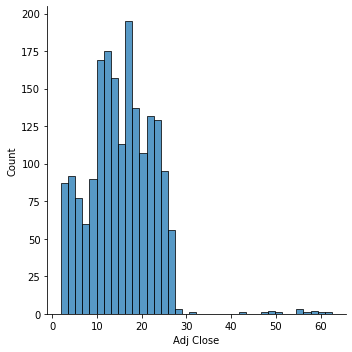

In [35]:
sns.displot(target);

In [39]:
## 가격이 right_skewed 된 상태이므로 log-transform 을 하겠습니다.
target
transformed = np.log1p(target)
backtooriginal = np.expm1(transformed)

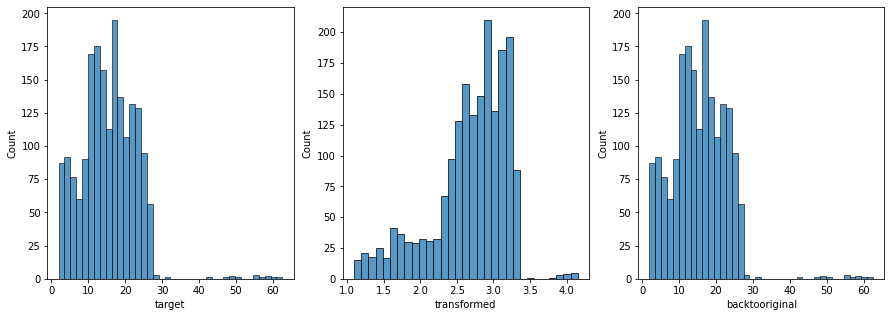

In [42]:
plots = pd.DataFrame()
plots['target'] = target
plots['transformed']=np.log1p(target)
plots['backtooriginal']=np.expm1(transformed)

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['target'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backtooriginal'], ax=ax[2]);

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
- **(객관식) 다음 설명 중 가장 틀린 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. 특정한 종목의 다음날 주식 종가를 예측하는 문제는 Supervised Learning 문제이다.
    2. 다음날 KOSPI 지수가 증가할지 감소할지 예측하는 문제는 Classification 문제이다.
    3. 축구 경기 도중에 승패를 예측하는 모델을 만들기 위해서는 실시간 통계 정보와 경기마다 승패 데이터가 필요하다.
    4. 이번 시즌 토트넘 선수들의 개인 통계 데이터(슛, 도움, ...)를 사용해서 다음 토트넘 경기의 승패를 예측할 수 있다.
   

In [45]:
### 이곳에서 과제를 진행해 주세요 ### 

target = 'Adj Close'
from sklearn.model_selection import train_test_split

df = stock_data[stock_data[target].notna()]

train, val = train_test_split(df, test_size=260, random_state=2)

features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [49]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)


pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.9894829721346333

In [51]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)

tt = TransformedTargetRegressor(regressor=pipe,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
tt.score(X_val, y_val)

0.9922100212053071

In [50]:
accuracy.score(X_train, y_train)

NameError: ignored

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.
- **(객관식) 같은 데이터로 스팸을 예측하는 모델 A와 B를 만들었습니다. 다음 설명 중 가장 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. A의 재현율은 80%이고 B의 재현율은 60%일 때 A가 더 좋은 모델이다.
    2. A의 정밀도는 80%이고 B의 정밀도는 60%일 때 A가 더 좋은 모델이다.
    3. A는 B보다 정밀도는 높지만 재현율은 낮다. A가 더 좋은 모델이다.
    4. A는 B보다 재현율은 높지만, 정밀도는 낮다. A가 더 좋은 모델이다.
    5. A는 B보다 정밀도, 재현율 모두 높다. A가 더 좋은 모델이다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

## 🔥 도전과제

### 4) 데이터를 훈련/검증/테스트 데이터로 나누고 전처리를 수행합니다. 그리고 간단한 모델을 사용해서 학습을 수행합니다.
- 이상치(outliers)가 있다면 어떻게 처리할 것인지 설명합니다.
- 무작위로 or 시간에 따라 데이터를 나눌 것인지 설명합니다.
- 모델 학습 결과를 리포팅 합니다.
- 정보 누수(leakage)가 있는지 확인해 봅니다.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 